In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect, 

In [5]:
engine = create_engine('sqlite:///Starter_Code/Resources/hawaii.sqlite')
connect = engine.connect()
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
Station = Base.classes.station
Station
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [11]:
session = Session(bind=engine)

In [17]:
conn = engine.connect()

# Exploratory Precipitation Analysis

In [122]:
s = conn.execute(text('SELECT * FROM station')).fetchall()
station = pd.DataFrame(s)
station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [21]:
m = conn.execute(text('SELECT * FROM measurement')).fetchall()
measurement = pd.DataFrame(m)
measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [28]:
last_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
last_date

datetime.date(2016, 8, 23)

In [36]:
precipitation = [ Measurement.date,
                Measurement.prcp]
last12 = session.query(*precipitation).\
    filter(func.strftime(Measurement.date) >= last_date).\
    order_by(Measurement.date).all()
last12months = pd.DataFrame(last12, columns=['date', 'precipitation'])
last12months

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [40]:
last12months.sort_values(by='date',ascending=True)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


In [56]:
last12months.dat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


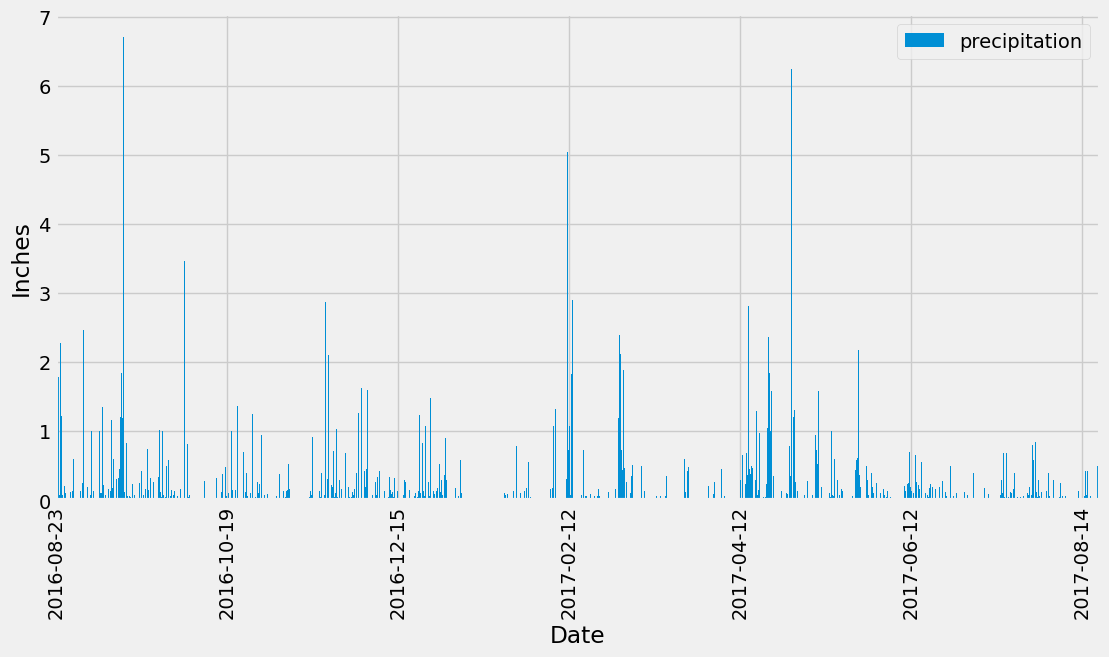

In [116]:
plot = last12months.plot(kind='bar', x= 'date', figsize = (12, 6), width=1)
plot.axes.set(xlabel="Date")
plot.axes.set(ylabel="Inches")
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

In [48]:
last12months.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [133]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count
print(f'There are {station_count[0][0]} stations in this dataset.')

There are 9 stations in this dataset.


In [126]:

# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station2 = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:

# Station with highest number of observations
max_station = station2[0][0]
max_station
print(f'The station with the highest number of observations is {max_station}.')

The station with the highest number of observations is USC00519281.


In [135]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'The minimum observed temperature is {min_temp[0][0]} C\n')
print(f'The maximum observed temperature is {max_temp[0][0]} C\n')
print(f'The average observed temperature is {avg_temp[0][0]} C\n')

The minimum observed temperature is 54.0 C

The maximum observed temperature is 85.0 C

The average observed temperature is 71.66378066378067 C



In [142]:
sel = [Measurement.date]
last_date2 = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').all()
last_date2
last_year = dt.date(2017,8,18) - dt.timedelta(days = 365)
last_year

datetime.date(2016, 8, 18)

In [143]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
select =[Measurement.station, Measurement.date, Measurement.tobs]
ly_temp = session.query(*select).filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= last_year).all()

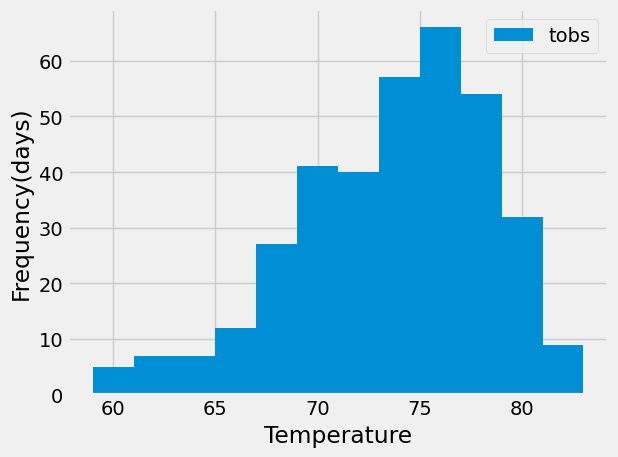

In [146]:
# Plot data in histogram for previous year dates and temperature for most active station 

temperatures = pd.DataFrame(ly_temp)
temperatures.plot.hist(column="tobs", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency(days)")
plt.tight_layout()
plt.show()

In [147]:
# Close Session
session.close()